# 教程0:LAT研讨会的介绍材料


在本导论教程中，我们将简明扼要地给出一些对于理解和使用LISA分析工具环境中开发的代码至关重要的Python主题。您亦将得到一个初步的教程结构。
此模块您应当在研讨会之前完成同时您需要确保它安装成功。
* 任务: 在我们的教程中，您将被给予“任务”。这些任务将指导您完成教程的方法并将教程分成自然7个部分。
* 问题: 在较大、繁重的任务中会给出附加题。这些附加题有的会要求您编程，有的不要求，并且其中很多的问题是需要您自己或小组讨论来完成的。
* 纲要: 根据手头的任务，我们将提供有助于完成任务的具体说明、少量代码和文档。为了使这些notebooks成功运行，用户必须完成大部分或全部实际编码。**注**:在许多情况下，特定代码库中的教程也可以让您接近正确答案。大多数情况下，用户必须浏览这些教程才能找到有用的答案。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful
from lisatools.utils.constants import *

## 任务1:构建并初始化一个类对象(class objects)。

类(class)是LISA分析工具及其相关代码构造的基本对象。理解和使用类(class)将最大化您对LISA分析工具的理解和能力。


构建一个有两个方法的类对象:`__init__`和`get_wave`。

在`__init__`中存储频率、振幅和初始相位。

在`get_wave`中，输入一个时间数组作为参数。然后使用存储在`self`和时间数组中的频率、振幅和初始相位向用户返回一个正弦函数结果。

有用的文档:
* [Python类对象](https://docs.python.org/3/tutorial/classes.html#class-objects)

In [24]:
class Waveform:
    def __init__(self, A, f, phi0):
        self.A = A
        self.f = f
        self.phi0 = phi0

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi0)

现在，通过提供必要的参数来实例化类。为time数组构建一个numpy数组，并测试类的输出。

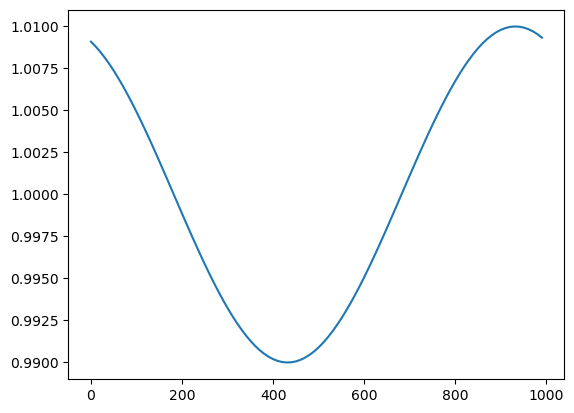

In [23]:
t_arr = np.arange(0.0, 1000.0, 10.0)

wave = Waveform(1e-2, 1e-3, 2.0)

y = wave.get_wave(t_arr)

plt.plot(t_arr, y)



## 任务2: `*args` 与 `**kwargs`



使用`lisatools`的另一个重要主题是`** args`和`**kwargs`的使用。这些是灵活传递参数(`*args`)和关键字参数(`**kwargs`)的方法。在这里，我们将试验几种工作方式。

有用的文档:
* [示范](https://www.geeksforgeeks.org/args-kwargs-python/)


我们实际上是在复制这些例子。首先设计一个函数，它接受灵活数量的参数并打印出来。函数签名是`func(*args)`。在这种情况下，args将是一个可迭代对象，因此可以使用for循环迭代这些参数。

In [25]:
def func(*args):
    for arg in args:
        print(arg)

func(1314,"YNU","GR")

1314
YNU
GR



在`*args`之前添加一些参数到函数签名中，观察它是如何变化的。

In [26]:
def func(x, y, *args):
    for arg in args:
        print(arg)

func(666,777, "CANSHU")

CANSHU



现在对`func(**kwargs)`做同样的事情。这将生成一个字典，因此在for循环中打印出来。

In [27]:
def func(**kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(x=1.0, y=" :) ")

x 1.0
y  :) 



`**kwargs`在使函数变得灵活时非常有用，因为你可以让它输入特定的`kwargs`所需的字段，并将任何其他字段存储在`**kwargs`字典中。在函数签名中添加关键字参数，看看它如何改变打印结果。

In [28]:
def func(x=2, y=1, **kwargs):
    for key, val in kwargs.items():
        print(key, val)

func(x=1.0, y=10, z=" :) ")

z  :) 


您还可以高效地执行倒排操作。你可以使用`*args`在函数调用中输入可迭代对象，它会将你的可迭代对象扩展到函数签名中的args。调用一个只带2个参数的函数。然后，创建一个包含2个元素的列表。使用`*list`将它输入到函数调用中，并在函数中打印输出。

In [29]:
def func(x, y, z):
    print(x, y, z)

inputs = [4, 6, 8]

func(*inputs)

4 6 8



同样的方法也适用于kwargs，可以使用任何名为`**dict`的输入字典。对`kwargs`做同样的事情。

In [30]:
def func(x=4, y=6, z=8):
    print(x, y, z)

in_dict = {"x": 1.0, "y": 10, "z": " :) "}
func(**in_dict)

in_dict = {"x": 1.0, "y": 10}
func(**in_dict)

1.0 10  :) 
1.0 10 8


## 任务3: 类继承(Class inheritance)


类继承变得更加复杂。对于研讨会来说，了解这些并不是必须的，但它确实可以帮助您理解LISA分析工具和其他为未来的开发和维护而设计的抽象代码库。

从上面复制你的类。为`__init__`函数添加一个关键字参数，它接受正弦函数从0开始的垂直偏差(一个浮点值)。将它存储到`self`中。在`get_wave`内部，将这个值添加到正弦返回值的末尾。

**注意**:确保为$A$输入的任何值都不会与添加的偏差因子相差太多数量级。否则，您可能会遇到机器精度问题。

In [31]:
class Waveform:
    def __init__(self, A, f, phi0, factor=1.0):
        self.A = A
        self.f = f
        self.phi0 = phi0
        self.factor = 1.0

    def get_wave(self, t_arr):
        return self.A * np.sin(2 * np.pi * self.f * t_arr + self.phi0) + self.factor



现在，我们将创建一个类，它将继承上面的类，并在计算过程中调整其输出。为这个类添加两个方法:

在`__init__`中，让它接受一个表示乘性因子的参数(一个浮点值)。将它存储在`self`中。然后，在函数签名中添加可调数量的参数和关键字参数，以确保它是灵活的。将这些参数和键值参数传递给父类:
```
super(ChildClass, self).__init__(*args, **kwargs)
```

函数上的`__call__`方法允许用户初始化一个类，并将其作为一个函数或`callable`传递。换句话说:`c = Class()` -> `y = c(x)`，而不是必须命名一个特定的方法，如`get_wave`。

有用的文档:
* [`__call__`](https://www.geeksforgeeks.org/__call__-in-python/)(可点击链接)

在`__call__`中，接收一个参数，时间数组(numpy数组)，并将其放入`get_wave`方法中。获取`get_wave`的输出并乘以存储的乘性因子。将其返回给用户。

In [32]:
class ChildClass(Waveform):
    def __init__(self, multiplicative_factor, *args, **kwargs):
        self.multiplicative_factor = multiplicative_factor

        # initialize the parent class
        super(ChildClass, self).__init__(*args, **kwargs)

    def __call__(self, t_arr):
        y = self.get_wave(t_arr)
        return y * self.multiplicative_factor

现在初始化并测试类。

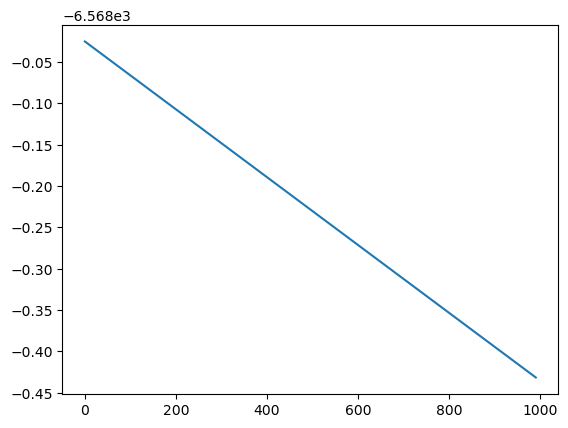

In [37]:
check = ChildClass(1000.0, 10.0, 1e-8, 4.0, factor=20.0)
plt.plot(t_arr, check(t_arr))

##  一份`pdb` 声明 

(Michael的观点)

python调试器([pdb](https://docs.python.org/3/library/pdb.html))是一个非常有用的工具。对我来说，它和`Numpy`和`Matplotlib`一样有用。它从开发过程中节省了如此多的时间，老实说，这是不可估量的。`pdb`允许你在代码的任何地方使用大多数单行的`ipython`命令。换句话说，你可以停止Python代码并运行函数、打印任何存储的变量、存储新变量、绘制图形等。

我注意到很多人不知道这个python固有的库，或者不使用它。


我的开发代码文件的开头通常是:
```
import numpy as np


if __name__ == "__main__":

    # debugger at the end to catch and analyze any output. 
    breakpoint()  
```
我经常这样做，在写这篇文章的时候，我称之为“主动调试”。主动调试意味着代码会一直运行，直到我要开发的地方。然后我将在调试器中逐行开发，并测试每一行代码。一旦它工作了，它就会被粘贴到代码中。这是一个有点乏味的习惯，有时不起作用(只是有时)，但我强烈建议尝试一下。在我看来，这是一种非常有效的开发代码的方法。

我们不打算在这里练习它因为它在笔记本上不太好用。它在终端中更有用。在终端中，它几乎是一种类似ipython的体验，在你放置`断点`的代码中任意位置停止。你可以使用它来停止在你设计的函数中，或者在其他python代码中。换句话说，你可以打开`$PATH`中的python代码，并在其中放置一个断点。然后，您可以运行调用此包的代码。它会在断点处停止。您可以单步执行并打印您需要的任何内容。在过去，这真的帮助我学习更好的编码技术，并理解其他人设计的复杂代码。

文档如下:
* [pdb](https://docs.python.org/3/library/pdb.html)



# 学习总结和收获概述

1. 在本教程中，我首先学到了一些专业的计算机词汇的翻译，譬如class翻译为类等
2. 其次，我学到了如何配置相关的Linux环境，本人通过自学和线上的资源，学会了使用vscode的wsl插件，在windows系统里面插入Linux（ubuntu）子系统，然后打开隧道进行编写。
3. 本人最初在配置环境时，使用了VMware虚拟机，但是本人是先写的任务一，任务一使用CUDA调用GPU无法在虚拟机中运行，即无法把GPU硬件虚拟化，所以配置了此子系统，并打开了隧道。
4. 学会如何使用Jupyter集成环境，更方便地进行代码的学习和编写，注释也更方便，可以分段地进行代码运行和相关的查看
5. 成功安装了LISAtools和Lisa_env内核

在本教程0中，我接触到了一些新的python概念，譬如类和类继承，通过这部分的自学和相关资料的查询，类和类继承在lisa代码中经常用到，至关重要。同时我也在本教程中进行了相关的操作和了解。